<h4>Task-10: Take a 5x6 NumPy array and plot the histogram of the array with proper labels (with and without built in histogram function). Show both histograms side by side in a subplot with a title. Show input NumPy array into an image.</h4>

Text(0.5, 1.0, 'Numpy Image')

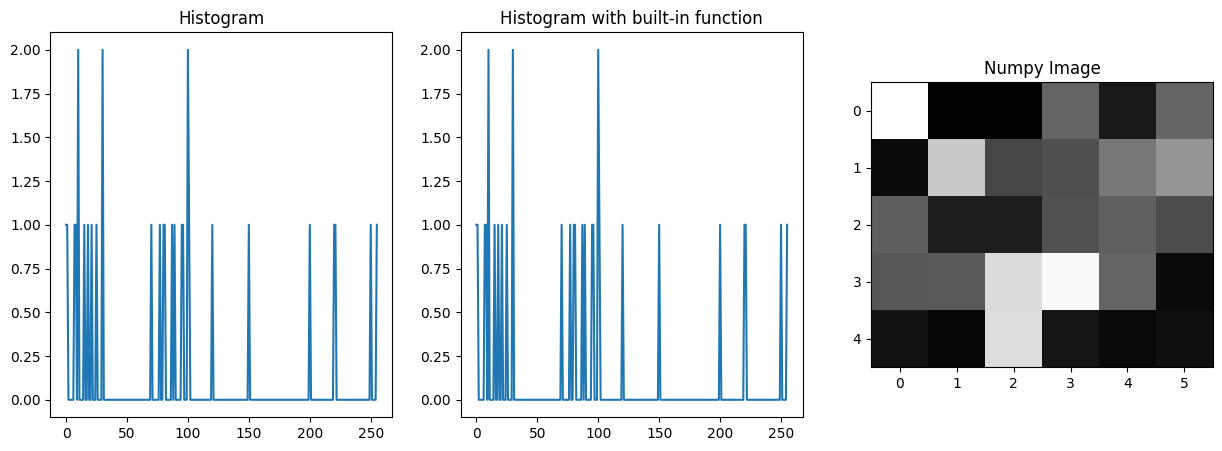

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('/Users/mdarikrayhan/Documents/GitHub/Digital-Image-Processing/Lab 6/photo.jpg')

array = np.array([[255, 0, 1, 100, 25, 101], [10, 200, 70, 80, 120, 150], [
                 95, 30, 30, 81, 96, 77], [87, 89, 220, 250, 100, 10], [18, 7, 221, 21, 8, 15]])

hist = np.zeros(256)
for i in range(array.shape[0]):
    for j in range(array.shape[1]):
        hist[array[i, j]] += 1

hist2, bins = np.histogram(array, 256, [0, 256])

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(hist)
plt.title('Histogram')
plt.subplot(1,3,2)
plt.plot(hist2)
plt.title('Histogram with built-in function')
plt.subplot(1,3,3)
plt.imshow(array, cmap='gray')
plt.title('Numpy Image')

<h4>Task-11: Take an 8-bit grayscale image and plot the histogram of the image with proper labels (with and without built in histogram function). Show both histograms side by side in a subplot with a title.</h4>

Text(0.5, 1.0, 'Histogram with built-in function')

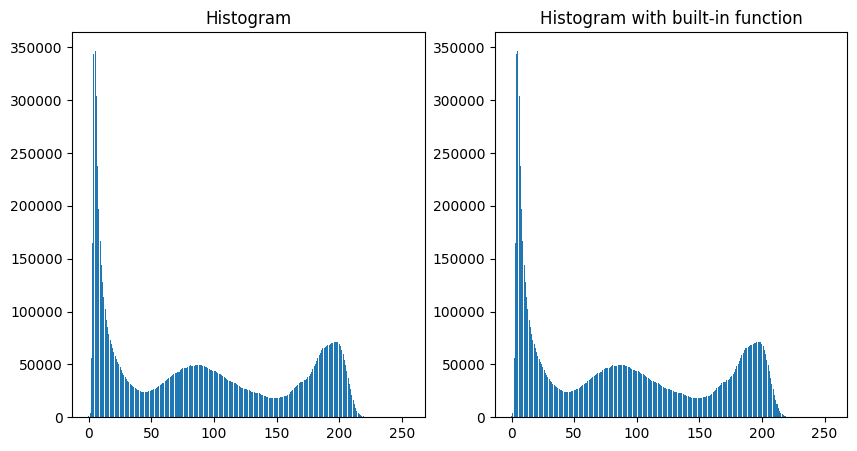

In [3]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hist = np.zeros(256)
for i in range(img_gray.shape[0]):
    for j in range(img_gray.shape[1]):
        hist[img_gray[i, j]] += 1

hist2, bins = np.histogram(img_gray, 256, [0, 256])
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.bar(range(256), hist)
plt.title('Histogram')
plt.subplot(1,2,2)
plt.bar(range(256), hist2)
plt.title('Histogram with built-in function')

<h4>Task-12: Take an 8-bit grayscale image and plot the histogram equalized image as well as its histogram with proper labels (with and without built in histogram function). Show both histograms side by side in a subplot with a title. Show both equalized image side by side in a subplot with a title.</h4>

Text(0.5, 1.0, 'Histogram of Equalized Image')

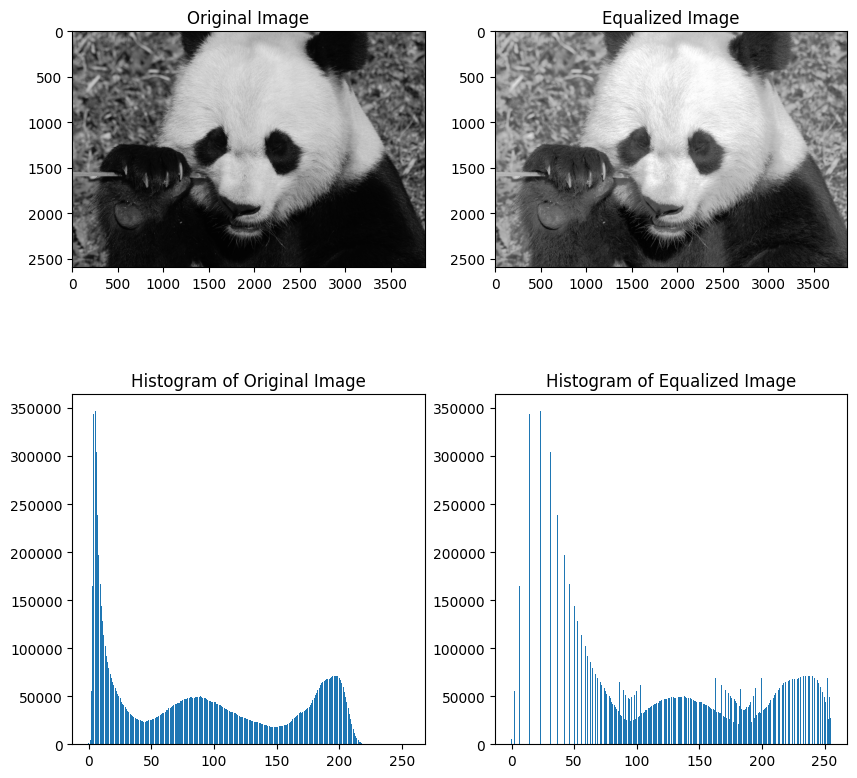

In [4]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hist = np.zeros(256)
for i in range(img_gray.shape[0]):
    for j in range(img_gray.shape[1]):
        hist[img_gray[i, j]] += 1

# Histogram equalization
cdf = np.zeros(256)
cdf[0] = hist[0]
for i in range(1, 256):
    cdf[i] = cdf[i-1] + hist[i]

cdf = cdf * 255 / cdf[255]

img_eq = np.zeros(img_gray.shape)
for i in range(img_gray.shape[0]):
    for j in range(img_gray.shape[1]):
        img_eq[i, j] = cdf[img_gray[i, j]]

#histogram of the equalized image
hist1 = np.zeros(256)
for i in range(img_eq.shape[0]):
    for j in range(img_eq.shape[1]):
        pixel = round(img_eq[i, j])
        hist1[pixel] += 1


plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Image')
plt.subplot(2,2,2)
plt.imshow(img_eq, cmap='gray')
plt.title('Equalized Image')
plt.subplot(2,2,3)
plt.bar(range(256), hist)
plt.title('Histogram of Original Image')
plt.subplot(2,2,4)
plt.bar(range(256), hist1)
plt.title('Histogram of Equalized Image')


<h4>Task-13: Take a 6x6 NumPy array apply convolution operation of the array. Use zero padding and consider a 3x3 mask/kernel for convolution (with and without built in function). Show both input and output array. Show both input and output NumPy array into an image and show them side by side in a subplot with a title.</h4>

[[ 78  62  39  50  61  55]
 [ 73  88  70  76  96  82]
 [ 58  83  96 109 102  65]
 [ 49  88 137 137  83  33]
 [ 26  70 128 127  73  24]
 [ 10  31  71 101  79  27]]

[[ 78  62  39  50  61  55]
 [ 73  88  70  76  96  82]
 [ 58  83  96 109 102  65]
 [ 49  88 137 137  83  33]
 [ 26  70 128 127  73  24]
 [ 10  31  71 101  79  27]]


Text(0.5, 1.0, 'Image after convolution with built-in function')

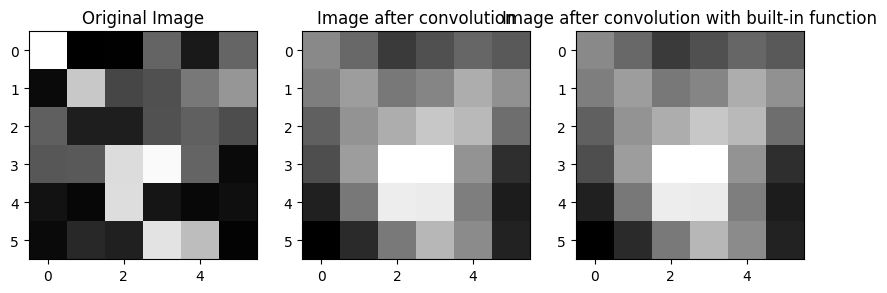

In [7]:
arr = np.array([[255, 0, 1, 100, 25, 101], [10, 200, 70, 80, 120, 150], [
                 95, 30, 30, 81, 96, 77], [87, 89, 220, 250, 100, 10], [18, 7, 221, 21, 8, 15],[10,40,33,227,189,3]],np.uint8)
temp = np.array([[255, 0, 1, 100, 25, 101], [10, 200, 70, 80, 120, 150], [
                 95, 30, 30, 81, 96, 77], [87, 89, 220, 250, 100, 10], [18, 7, 221, 21, 8, 15],[10,40,33,227,189,3]],np.uint8)

#use zero padding on array
arr = np.pad(arr, 1, 'constant', constant_values=0)

#use 3x3 gaussian filter manually
filter = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])/16
ans=arr.copy()
for i in range(1, arr.shape[0]-1):
    for j in range(1, arr.shape[1]-1):
        ans[i, j] = round(np.sum(arr[i-1:i+2, j-1:j+2]*filter))
#remove zero padding
ans = ans[1:ans.shape[0]-1, 1:ans.shape[1]-1]
print(ans)
print()

#using built-in function
conv2 = cv2.filter2D(arr, -1, filter)
#remove zero padding conv2
conv2 = conv2[1:conv2.shape[0]-1, 1:conv2.shape[1]-1]
print(conv2)

plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(temp, cmap='gray')
plt.title('Original Image')
plt.subplot(1,3,2)
plt.imshow(ans, cmap='gray')
plt.title('Image after convolution')
plt.subplot(1,3,3)
plt.imshow(conv2, cmap='gray')
plt.title('Image after convolution with built-in function')


<h4>Task-14: Take an 8-bit grayscale image and apply smoothing operation by using mean filter (with and without built in image smoothing function). Show both input and output image side by side in a subplot with a title.</h4>

Text(0.5, 1.0, 'Mean filter built-in')

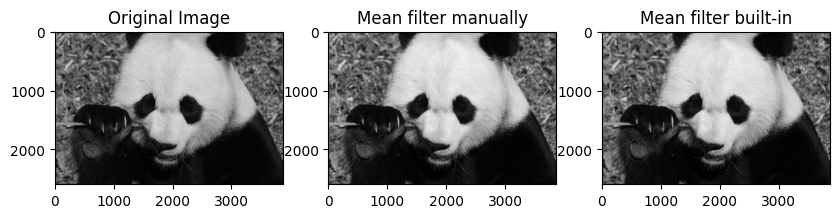

In [9]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#apply mean filter with 3x3 kernel size manually
filter = np.ones((3,3))/9
ans = img_gray.copy()
#use zero padding on ans
ans = np.pad(ans, 1, 'constant', constant_values=0)
for i in range(1, ans.shape[0]-1):
    for j in range(1, ans.shape[1]-1):
        ans[i, j] = round(np.sum(ans[i-1:i+2, j-1:j+2]*filter))
#remove zero padding
ans = ans[1:ans.shape[0]-1, 1:ans.shape[1]-1]

#apply mean filter with 3x3 kernel size with built-in function
conv2 = cv2.filter2D(img_gray, -1, filter)

plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Image')
plt.subplot(1,3,2)
plt.imshow(ans, cmap='gray')
plt.title('Mean filter manually')
plt.subplot(1,3,3)
plt.imshow(conv2, cmap='gray')
plt.title('Mean filter built-in')

<h4>Task-15: Take an 8-bit grayscale image and apply smoothing operation by using weighted averaging filter (with and without built in image smoothing function). Show both input and output image side by side in a subplot with a title.</h4>

Text(0.5, 1.0, 'Weighted average filter built-in')

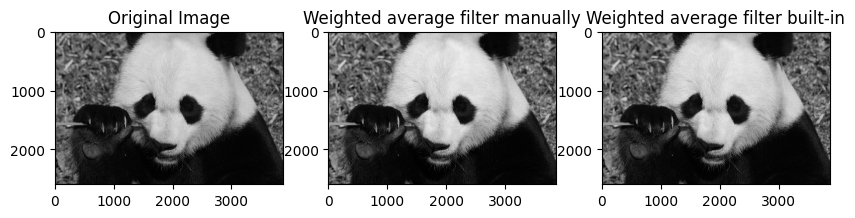

In [10]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#apply weighted average filter with 3x3 kernel size manually
filter = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])/16
ans = img_gray.copy()
#use zero padding on ans
ans = np.pad(ans, 1, 'constant', constant_values=0)
for i in range(1, ans.shape[0]-1):
    for j in range(1, ans.shape[1]-1):
        ans[i, j] = round(np.sum(ans[i-1:i+2, j-1:j+2]*filter))
#remove zero padding
ans = ans[1:ans.shape[0]-1, 1:ans.shape[1]-1]

#apply weighted average filter with 3x3 kernel size with built-in function
conv2 = cv2.filter2D(img_gray, -1, filter)

plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Image')
plt.subplot(1,3,2)
plt.imshow(ans, cmap='gray')
plt.title('Weighted average filter manually')
plt.subplot(1,3,3)
plt.imshow(conv2, cmap='gray')
plt.title('Weighted average filter built-in')

<h4>Task-16: Take an 8-bit grayscale image and apply smoothing operation by using gaussian filter (with and without built in image smoothing function). Show both input and output image side by side in a subplot with a title.</h4>